In [4]:
import os
import glob
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.layers import TimeDistributed 
import tkinter as tk
from tkinter import filedialog
from pydub import AudioSegment
import sounddevice as sd
from PIL import Image, ImageTk 

c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [6]:
import os
import glob
import librosa
import numpy as np

# Feature extraction function
def extract_features(file_path):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    features = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13).T, axis=0)
    return features

# Updated dataset path
dataset_path = r"C:\Users\moham\Downloads\Emotion_Recognition_Project\Speech_Emotion_Recognition\TESS Toronto emotional speech set data"

data = []
labels = []

# Loop through folders and process .wav files
for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    for file_path in glob.glob(os.path.join(folder_path, '*.wav')):
        print(file_path)
        features = extract_features(file_path)
        data.append(features)
        labels.append(folder_name)


C:\Users\moham\Downloads\Emotion_Recognition_Project\Speech_Emotion_Recognition\TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav
C:\Users\moham\Downloads\Emotion_Recognition_Project\Speech_Emotion_Recognition\TESS Toronto emotional speech set data\OAF_angry\OAF_bar_angry.wav
C:\Users\moham\Downloads\Emotion_Recognition_Project\Speech_Emotion_Recognition\TESS Toronto emotional speech set data\OAF_angry\OAF_base_angry.wav
C:\Users\moham\Downloads\Emotion_Recognition_Project\Speech_Emotion_Recognition\TESS Toronto emotional speech set data\OAF_angry\OAF_bath_angry.wav
C:\Users\moham\Downloads\Emotion_Recognition_Project\Speech_Emotion_Recognition\TESS Toronto emotional speech set data\OAF_angry\OAF_bean_angry.wav
C:\Users\moham\Downloads\Emotion_Recognition_Project\Speech_Emotion_Recognition\TESS Toronto emotional speech set data\OAF_angry\OAF_beg_angry.wav
C:\Users\moham\Downloads\Emotion_Recognition_Project\Speech_Emotion_Recognition\TESS Toronto emotional speech set 

In [7]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)

X_train = np.array(X_train)[:, np.newaxis, :]
X_test = np.array(X_test)[:, np.newaxis, :]

model = Sequential()
model.add(TimeDistributed(Dense(256, activation='relu'), input_shape=(1, X_train.shape[2])))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.0725 - loss: 2.8384 - val_accuracy: 0.0661 - val_loss: 2.6496
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0686 - loss: 2.7461 - val_accuracy: 0.1339 - val_loss: 2.5943
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0755 - loss: 2.6960 - val_accuracy: 0.1339 - val_loss: 2.6030
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0765 - loss: 2.6506 - val_accuracy: 0.0893 - val_loss: 2.5590
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1087 - loss: 2.5909 - val_accuracy: 0.1786 - val_loss: 2.4719
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1259 - loss: 2.5289 - val_accuracy: 0.3304 - val_loss: 2.2745
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1587 - loss: 2.4511 - val_accuracy: 0.1875 - val_loss: 2.1893
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1822 - loss: 2.2945 - val_accuracy: 0.2464 - 

In [8]:
def predict_emotion(audio_file):
    features = extract_features(audio_file)
    features = features[np.newaxis, np.newaxis, :]  
    print("Features shape:", features.shape)
    print("Features:", features)

    predicted_probabilities = model.predict(features)
    print("Predicted probabilities shape:", predicted_probabilities.shape)
    print("Predicted probabilities:", predicted_probabilities)

    predicted_label_index = np.argmax(predicted_probabilities)
    print("Predicted label index:", predicted_label_index)

    predicted_emotion = label_encoder.classes_[predicted_label_index]
    print("Predicted emotion:", predicted_emotion)


    # Emotion mapping for TESS dataset
    emotion_mapping = {
        'YAF_angry': 'ANGRY',
        'YAF_disgust': 'DISGUST',
        'YAF_fear': 'FEAR',
        'YAF_happy': 'HAPPY',
        'YAF_neutral': 'NEUTRAL',
        'YAF_pleasant_surprised': 'SURPRISED',
        'YAF_sad': 'SAD',
        'OAF_angry': 'ANGRY',
        'OAF_disgust': 'DISGUST',
        'OAF_Fear': 'FEAR',
        'OAF_happy': 'HAPPY',
        'OAF_neutral': 'NEUTRAL',
        'OAF_Pleasant_surprised': 'SURPRISED',
        'OAF_Sad': 'SAD',
    }


    recognizable_emotion = emotion_mapping.get(predicted_emotion)
    return recognizable_emotion


In [20]:
pip install sounddevice scipy matplotlib pillow 


Note: you may need to restart the kernel to use updated packages.


[DEBUG] Starting EmotionApp GUI
[DEBUG] Initializing EmotionApp
[DEBUG] Showing home page
[DEBUG] Clearing window
[DEBUG] Applying theme. Dark mode: False
[DEBUG] Showing record audio page
[DEBUG] Clearing window
[DEBUG] Displaying back button
[DEBUG] Applying theme. Dark mode: False
[DEBUG] Starting recording
[DEBUG] Recorded audio saved to: C:\Users\moham\AppData\Local\Temp\tmp52_v6u69.wav
[DEBUG] Displaying result for: Recorded_Audio.wav
[DEBUG] Clearing window
[DEBUG] Displaying back button
[DEBUG] Applying theme. Dark mode: False
[DEBUG] Predicting emotion for: C:\Users\moham\AppData\Local\Temp\tmp52_v6u69.wav
[DEBUG] Predicted emotion: SURPRISED with probabilities: [0.18016284 0.13063234 0.09955134 0.2633519  0.11511195 0.16333678
 0.04785285]
[DEBUG] Loading emoji from: C:\\Users\\moham\\Downloads\\Emotion_Recognition_Project\\Speech_Emotion_Recognition\\Emotion Emojis\\Emoji\surprised.gif
[DEBUG] Displaying emotion bar chart
[DEBUG] Showing home page
[DEBUG] Clearing window
[DE

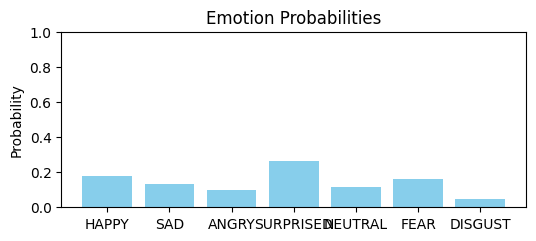

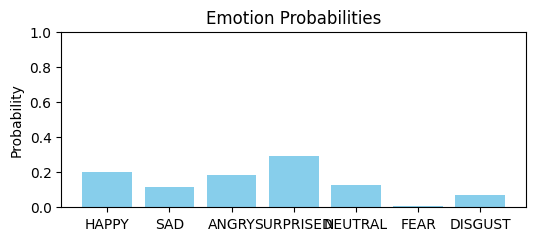

In [1]:
import os
import csv
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import ImageTk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import sounddevice as sd
import scipy.io.wavfile as wav
import tempfile

# Dummy emotion prediction function — replace with your actual model
def predict_emotion(audio_path):
    print(f"[DEBUG] Predicting emotion for: {audio_path}")
    emotions = ['HAPPY', 'SAD', 'ANGRY', 'SURPRISED', 'NEUTRAL', 'FEAR', 'DISGUST']
    probabilities = np.random.dirichlet(np.ones(len(emotions)), size=1).flatten()
    predicted_index = np.argmax(probabilities)
    print(f"[DEBUG] Predicted emotion: {emotions[predicted_index]} with probabilities: {probabilities}")
    return emotions[predicted_index], dict(zip(emotions, probabilities))

class EmotionApp:
    def __init__(self, root):
        print("[DEBUG] Initializing EmotionApp")
        self.root = root
        self.root.title("Speech Emotion Recognition")
        self.root.geometry("600x600")
        self.dark_mode = False

        self.base_emoji_path = r"C:\\Users\\moham\\Downloads\\Emotion_Recognition_Project\\Speech_Emotion_Recognition\\Emotion Emojis\\Emoji"
        self.emotion_to_emoji = {
            "HAPPY": os.path.join(self.base_emoji_path, "happy.gif"),
            "SAD": os.path.join(self.base_emoji_path, "sad.gif"),
            "ANGRY": os.path.join(self.base_emoji_path, "angry.gif"),
            "SURPRISED": os.path.join(self.base_emoji_path, "surprised.gif"),
            "NEUTRAL": os.path.join(self.base_emoji_path, "neutral.gif"),
            "FEAR": os.path.join(self.base_emoji_path, "fear.gif"),
            "DISGUST": os.path.join(self.base_emoji_path, "disgust.gif")
        }

        self.emoji_label = None
        self.emoji_image = None
        self.prediction_history = []

        self.show_home_page()

    def clear_window(self):
        print("[DEBUG] Clearing window")
        for widget in self.root.winfo_children():
            widget.destroy()

    def apply_theme(self):
        print(f"[DEBUG] Applying theme. Dark mode: {self.dark_mode}")
        bg = '#1e1e1e' if self.dark_mode else 'white'
        fg = 'white' if self.dark_mode else 'black'
        self.root.configure(bg=bg)
        return bg, fg

    def back_button(self, command):
        print("[DEBUG] Displaying back button")
        tk.Button(self.root, text="\u2190 Back", command=command, bg='lightgrey').place(x=10, y=10)

    def show_home_page(self):
        print("[DEBUG] Showing home page")
        self.clear_window()
        bg, fg = self.apply_theme()

        tk.Label(self.root, text="\U0001F3A7 Speech Emotion Recognition", font=('Helvetica bold', 18), bg=bg, fg=fg).pack(pady=40)

        tk.Button(self.root, text="\U0001F399\ufe0f Record Audio", command=self.record_audio_page, bg='orange').pack(pady=10)
        tk.Button(self.root, text="\U0001F4C1 Upload Audio", command=self.upload_audio_page, bg='lightgreen').pack(pady=10)
        tk.Button(self.root, text="\U0001F4DC Prediction History", command=self.show_history_page, bg='lightblue').pack(pady=10)
        tk.Button(self.root, text="\U0001F4D8 User Manual", command=self.show_user_manual, bg='khaki').pack(pady=10)
        tk.Button(self.root, text="\u2139\ufe0f About the App", command=self.show_about_page, bg='lavender').pack(pady=10)
        tk.Button(self.root, text="\U0001F319 Toggle Dark Mode", command=self.toggle_dark_mode, bg='gray').pack(pady=10)
        tk.Button(self.root, text="\u274C Exit", command=self.confirm_exit, bg='red', fg='white').pack(pady=10)

    def confirm_exit(self):
        print("[DEBUG] Confirming exit")
        if messagebox.askokcancel("Exit", "Do you really want to exit?"):
            self.root.destroy()

    def toggle_dark_mode(self):
        print("[DEBUG] Toggling dark mode")
        self.dark_mode = not self.dark_mode
        self.show_home_page()

    def show_user_manual(self):
        print("[DEBUG] Showing user manual")
        self.clear_window()
        self.back_button(self.show_home_page)
        bg, fg = self.apply_theme()

        manual = (
            "\U0001F4D8 USER MANUAL\n\n"
            "1. \U0001F399\ufe0f Click 'Record Audio' to use your microphone.\n"
            "2. \U0001F4C1 Click 'Upload Audio' to select a .wav file.\n"
            "3. After prediction, you'll see:\n"
            "   - Emotion name\n"
            "   - Emoji animation\n"
            "   - Emotion probability chart\n"
            "4. Check 'Prediction History' for past results.\n"
            "5. Only '.wav' files are supported."
        )
        tk.Label(self.root, text=manual, justify="left", font=('Arial', 12), wraplength=550, bg=bg, fg=fg).pack(padx=20, pady=30)

    def show_about_page(self):
        print("[DEBUG] Showing about page")
        self.clear_window()
        self.back_button(self.show_home_page)
        bg, fg = self.apply_theme()

        about = (
            "\u2139\ufe0f ABOUT THE APP\n\n"
            "\U0001F539 FEATURES:\n"
            "- Record or upload audio\n"
            "- Predict emotion from speech\n"
            "- Animated emoji output\n"
            "- Bar chart of prediction confidence\n"
            "- Export results as CSV\n"
            "- Dark mode UI\n\n"
            "\U0001F539 APPLICATIONS:\n"
            "- AI Assistants\n"
            "- Customer Service\n"
            "- Mental Health Monitoring\n"
            "- Learning & Research\n\n"
            "\U0001F539 CREDITS:\n"
            "- Dataset: TESS (University of Toronto)\n"
            "- Developed using Python + Tkinter"
        )
        tk.Label(self.root, text=about, justify="left", font=('Arial', 12), wraplength=550, bg=bg, fg=fg).pack(padx=20, pady=30)

    def show_history_page(self):
        print("[DEBUG] Showing prediction history")
        self.clear_window()
        self.back_button(self.show_home_page)
        bg, fg = self.apply_theme()

        tk.Label(self.root, text="\U0001F4DC Prediction History", font=('Helvetica bold', 16), bg=bg, fg=fg).pack(pady=20)

        if self.prediction_history:
            for i, (file_name, emotion) in enumerate(self.prediction_history[::-1], start=1):
                print(f"[DEBUG] History item: {file_name}, {emotion}")
                tk.Label(self.root, text=f"{i}. {file_name} — Emotion: {emotion}", bg=bg, fg=fg).pack(anchor='w', padx=20)
            tk.Button(self.root, text="\U0001F4BE Export as CSV", command=self.export_csv, bg='orange').pack(pady=10)
        else:
            tk.Label(self.root, text="No history yet.", bg=bg, fg=fg).pack()

    def export_csv(self):
        print("[DEBUG] Exporting prediction history to CSV")
        file_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("CSV files", "*.csv")])
        if file_path:
            with open(file_path, mode='w', newline='') as file:
                writer = csv.writer(file)
                writer.writerow(["File Name", "Predicted Emotion"])
                writer.writerows(self.prediction_history)
            messagebox.showinfo("Success", "History exported successfully!")

    def upload_audio_page(self):
        print("[DEBUG] Showing upload audio page")
        self.clear_window()
        self.back_button(self.show_home_page)
        bg, fg = self.apply_theme()

        def choose_file():
            print("[DEBUG] Opening file dialog")
            file_path = filedialog.askopenfilename(filetypes=[("WAV Audio", "*.wav")])
            if file_path:
                print(f"[DEBUG] File selected: {file_path}")
                self.display_result(file_path, os.path.basename(file_path))

        tk.Label(self.root, text="\U0001F4C1 Upload a WAV File", font=('Helvetica bold', 16), bg=bg, fg=fg).pack(pady=40)
        tk.Button(self.root, text="Upload Audio", command=choose_file, bg='orange').pack(pady=10)

    def record_audio_page(self):
        print("[DEBUG] Showing record audio page")
        self.clear_window()
        self.back_button(self.show_home_page)
        bg, fg = self.apply_theme()

        def record_and_predict():
            print("[DEBUG] Starting recording")
            duration = 4
            fs = 44100
            tk.Label(self.root, text="Recording...", fg="red", bg=bg).pack()
            recording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
            sd.wait()

            with tempfile.NamedTemporaryFile(suffix=".wav", delete=False) as temp_file:
                wav.write(temp_file.name, fs, recording)
                print(f"[DEBUG] Recorded audio saved to: {temp_file.name}")
                self.display_result(temp_file.name, "Recorded_Audio.wav")

        tk.Label(self.root, text="\U0001F399\ufe0f Record Your Voice", font=('Helvetica bold', 16), bg=bg, fg=fg).pack(pady=40)
        tk.Button(self.root, text="Start Recording", command=record_and_predict, bg='orange').pack(pady=10)

    def display_result(self, file_path, file_name):
        print(f"[DEBUG] Displaying result for: {file_name}")
        self.clear_window()
        self.back_button(self.show_home_page)
        bg, fg = self.apply_theme()

        predicted_emotion, probabilities = predict_emotion(file_path)
        self.prediction_history.append((file_name, predicted_emotion))

        tk.Label(self.root, text="Predicted Emotion:", font=('Helvetica bold', 16), bg=bg, fg=fg).pack(pady=10)
        tk.Label(self.root, text=predicted_emotion, font=('Helvetica bold', 20), fg='blue', bg=bg).pack()

        emoji_path = self.emotion_to_emoji.get(predicted_emotion)
        if emoji_path and os.path.exists(emoji_path):
            print(f"[DEBUG] Loading emoji from: {emoji_path}")
            self.emoji_image = tk.PhotoImage(file=emoji_path)
            resized = self.emoji_image.subsample(int(self.emoji_image.width() / 240))
            self.emoji_label = tk.Label(self.root, image=resized, bg=bg)
            self.emoji_label.image = resized
            self.emoji_label.pack(pady=10)

        self.show_emotion_bar_chart(probabilities)

    def show_emotion_bar_chart(self, probabilities):
        print("[DEBUG] Displaying emotion bar chart")
        fig, ax = plt.subplots(figsize=(6, 3), dpi=100)
        emotions = list(probabilities.keys())
        probs = list(probabilities.values())

        ax.bar(emotions, probs, color='skyblue')
        ax.set_title('Emotion Probabilities')
        ax.set_ylim(0, 1)
        ax.set_ylabel('Probability')

        canvas = FigureCanvasTkAgg(fig, master=self.root)
        canvas.draw()
        canvas.get_tk_widget().pack(pady=10)

if __name__ == "__main__":
    print("[DEBUG] Starting EmotionApp GUI")
    root = tk.Tk()
    app = EmotionApp(root)
    root.mainloop()
